# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [89]:
import torch
import torch.nn as nn
#our optimizer
import torch.optim as optim
from monai.data import dataloader
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
#good to get architecture specifically for images
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [90]:
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")

#print("Path to dataset files:", path)

In [91]:
path ="/Users/adikrish/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2"

In [92]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        #Will assume that the sub folder will have the class name of that image. Do the labels for us
        self.data = ImageFolder(data_dir, transform=transform)
        pass
    #needs to know length
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        return self.data[idx]
    @property
    def classes(self):
        #returns the classes from there
        return self.data.classes

In [93]:
dataset = PlayingCardDataset(data_dir = path)

In [94]:
len(dataset)

8154

In [95]:
image, label = dataset[3000]

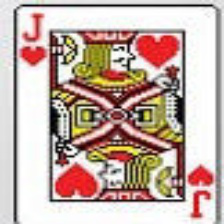

In [96]:
image

In [97]:
pathed = path + "/train"
target_to_class = {value: key for key,value in ImageFolder(pathed).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [98]:
transform = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])
#our transform does this with our transformation

In [99]:
dataset = PlayingCardDataset(data_dir = path, transform=transform)

In [100]:
image, label = dataset[100]
image.shape
#3 (RGB, 128 * 128 image)

torch.Size([3, 128, 128])

In [101]:
for image, label in dataset:
    #This way we can run over each image and label
    break

In [102]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [105]:
c = 0
for images, labels in dataloader:
    break

In [106]:
images.shape

torch.Size([32, 3, 128, 128])